<div align="center">
    <img src="images/logo_fmkn.png" alt="logo_fmkn" />
</div>

# Введение в рекуррентные нейронные сети

### Занятие 2. Обратное распространение ошибки (backpropagation)

<br />
<br />
16-17 января 2022

### Нейронная сеть как комбинация линейных моделей (напоминание)

<div align="center">
    <img src="images/nn_two_layers_cropped.jpg" alt="nn_two_layers_cropped" width=700 />
</div>


### Линейный классификатор (напоминание)

Предсказание $$ y_{pred} = x \cdot W + b $$

<div align="center">
    <img src="images/linear_classification_scheme.jpg" width=700/>
    $x\quad\quad\quad\cdot\quad W\quad\quad\quad+\quad b$
</div>


### Нейронная сеть

<div align="center">
    <img src="images/nn_scheme.jpg" width=700/>
</div>


### Нелинейные функции: ReLU, PReLU (LeakyReLU)

 $$\text{ReLU}(y) = \max(0, y), \\ \text{PReLU}(y) = \max(0, y) + \alpha\min(0, y)$$


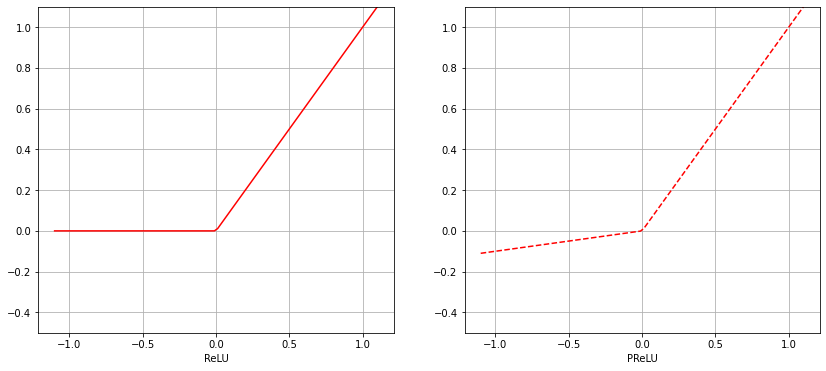

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_xlabel('ReLU')
ax2.set_xlabel('PReLU')

x1 = np.linspace(-1.1, 1.1, num=100)
ReLU = np.maximum([0] * len(x1), x1) 
ax1.plot(x1, ReLU, 'r', label='ReLU')
ax1.set_ylim(-0.5, 1.1)

x2 = np.linspace(-1.1, 1.1, num=100)
alpha = 0.1
PReLU = np.maximum([0] * len(x2), x2) + alpha * np.minimum([0] * len(x2), x2)
ax2.plot(x2, PReLU, 'r--', label='PReLU')
ax2.set_ylim(-0.5, 1.1)

ax1.grid(True)
ax2.grid(True)

fig.set_size_inches(14, 6)


### Функция потерь (напоминание)

$$ L(W, b) = - \sum\limits_j \ln \frac{e^{(x_jW + b)_{y_j}}}{\sum\limits_i e^{(x_jW + b)_{i}}} + \lambda R(W, b) \\
   R(W, b) = \|W\|_2^2 + \|b\|_2^2
$$


<div class="alert alert-info">
<b>Вопрос 1:</b> Как посчитать градиенты $\frac{\partial L}{\partial W}$ и $\frac{\partial L}{\partial b}$?
</div>

### Метод обратного распространения ошибки

### Граф вычислений

Внесём $b$ в $W$

$$ L(W) = - \sum\limits_j \ln p(c = y_j|x_j) + \lambda R(W) $$

<div align="center">
    <img src="images/graph_calc.png" width=800/>
</div>

Хотим найти градиенты функции потерь $L$ по всем входам графа вычислений.


### Простой пример

Производная сложной функции $f(g(x))\ \ \to \frac{df}{dx} = \frac{df}{dg} \frac{dg}{dx}$

Пусть $f(x, w) = 1 + e^{w_1x + w_0}$

<div align="center">
    <img src="images/simple_graph.png" width=600/>
</div>

$$ \frac{\partial f}{\partial f} = 1, \ f = c + 1, \ dc = \frac{\partial f}{\partial c} = 1, \dots$$


### Общая схема вычисления градиента

<div align="center">
    <img src="images/backprop_scheme.png" width=400/>
</div>


### Метод обратного распространения ошибки (backpropagation)

В итоге мы смогли вычислить все градиенты простыми операциями обратным проходом по графу

 * не выписывали всю производную целиком аналитически
 * на каждом шаге дифференцировали простую функцию
 * за один проход по графу вычислений
 * возможно распараллеливание

### В случае двуслойной нейросети

Выходные значения сети $a^m(x_i), m = 1 \dots M$ на объекте $x_i$:

$a^m(x_i) = \sigma_m \left( \sum\limits_{h=0}^H w_{hm} \color{red}{u^h(x_i)} \right)$

$\color{red}{u^h(x_i)} = \sigma_h \left( \sum\limits_{j=0}^J w_{jh} f_j(x_i) \right)$

Пусть для определенности

$\mathcal{L}_i (w) = \frac12 \sum\limits_{m=1}^M (a^m(x_i) - y_i^m)^2$

**Промежуточная задача**: частные производные

$\frac{\partial \mathcal{L}_i(w)}{\partial a^m},\ \ \frac{\partial \mathcal{L}_i(w)}{\partial u^h}$


### Быстрое дифференцирование. Вспомогательные градиенты

**Промежуточная задача**: частные производные

$\frac{\partial \mathcal{L}_i(w)}{\partial a^m} = a^m(x_i) - y_i^m = \varepsilon_i^m$

— это ошибка на выходном слое (для квадратичных потерь);

$\frac{\partial \mathcal{L}_i(w)}{\partial u^h} = \sum\limits_{m=1}^M (a^m(x_i) - y_i^m) \sigma_m^\prime w_{hm} = 
 \sum\limits_{m=1}^M \varepsilon_i^m \sigma_m^\prime w_{hm} = \varepsilon_i^h$

— назовём это *ошибкой на скрытом слое*.

Получается, что $\varepsilon_i^h$ вычисляется по $\varepsilon_i^m$, если запустить сеть «задом наперёд»:

<div align="center">
    <img src="images/backprop_eps.jpg" width=400/>
</div>


### Быстрое вычисление градиента

Теперь, имея частные производные $\mathcal{L}_i(w)$ по $a^m$ и $u^h$, легко выписать градиент $\mathcal{L}_i(w)$ по весам $w$:

$\frac{\partial \mathcal{L}_i(w)}{\partial w_{hm}} = \frac{\partial \mathcal{L}_i(w)}{\partial a^m} \frac{\partial a^m}{\partial w_{hm}} = \varepsilon_i^m \sigma^\prime_m u^h(x_i), \\ m = 1, \dots, M, h = 0, \dots, H$

$\frac{\partial \mathcal{L}_i(w)}{\partial w_{jh}} = \frac{\partial \mathcal{L}_i(w)}{\partial u^h} \frac{\partial u^h}{\partial w_{jh}} = \varepsilon_i^h \sigma^\prime_h f_j(x_i), \\ h = 1, \dots, H, j = 0, \dots, n$


### Алгоритм обратного распространения ошибки (BackPropagation)

1. инициализировать веса $w_{jh}, w_{hm}$

2. **повторять**
    3. выбрать объект $x_i$ из $X^\ell$ (например, случайно)
    4. прямой ход
    
    $u_i^h = \sigma_h \left(\sum_{j=0}^J w_{jh}x_i^j \right), h = 1, \dots, H$
    
    $a_i^m = \sigma_m \left(\sum_{h=0}^H w_{hm}u_i^h \right), \varepsilon_i^m = a_i^m - y_i^m, m =  1, \dots, M$
    
    $\mathcal{L}_i = \sum_{m=1}^M (\varepsilon_i^m)^2$

    5. обратный ход 
    
    $\varepsilon_i^h =\sum\limits_{m=1}^M \varepsilon_i^m \sigma_m^\prime w_{hm}, h = 1\dots H$

    6. градиентный шаг
    
    $w_{hm} = w_{hm} - \eta \varepsilon_i^m\sigma_m^\prime u_i^h, h = 0, \dots, H, m = 1\dots M$

    $w_{jh} = w_{jh} - \eta \varepsilon_i^h\sigma_h^\prime x_i^j, j = 0, \dots, n, h = 1\dots H$

    7. $Q = (1 - \lambda)Q + \lambda \mathcal{L}_i$

8. **пока** Q не стабилизируется

### Резюме

 * BackPropagation =  быстрое дифференцирование суперпозиций. Позволяет обучать сети практически любой конфигурации
 * Методы улучшения сходимости и качества:
   - обучение по мини-подвыборкам (mini-batch)
   - различные функции активации
 * Не было на этой лекции
   - различные алгоритмы оптимизации: adam, RMSProp
   - dropout
   - выбор начального приближения
   
### Что ещё можно посмотреть?
 * Лекция 3 курса «DL на пальцах» Семена Козлова: https://www.youtube.com/watch?v=kWTC1NvL894
 * 3blue1brown: https://www.youtube.com/watch?v=Ilg3gGewQ5U
 * В курсе Стенфорда: http://cs231n.github.io/optimization-2/
   